In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/rupertmenneer/Documents/git/bayesian_flow/')
from discretised.trainer import DiscretisedBFNTrainer
# 150e3a3656bc3e6c76366ee98da5b0fd9f7c16ea
trainer = DiscretisedBFNTrainer(wandb_project_name=None, checkpoint_file='./bfn_model_checkpoint.pth', max_lr=1)
# trainer.lr_sched.step()
# trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Loaded pretrained model checkpoint ./bfn_model_checkpoint.pth


(-0.05, 1.05, -338.1346498250962, 7252.798264575004)

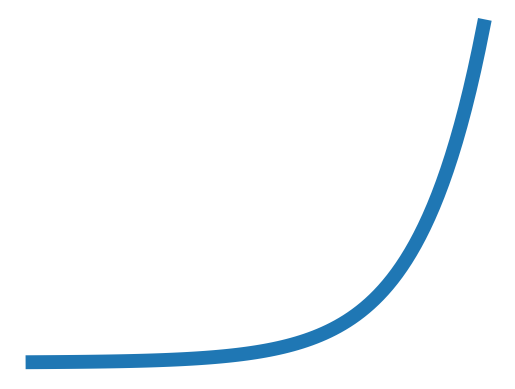

In [15]:
import torch
import matplotlib.pyplot as plt
t = torch.linspace(0, 1, 100)
sigma_one = trainer.bfn_model.sigma_one
acc = -2*torch.log(sigma_one)/sigma_one.pow(2*t)
# gamma = trainer.bfn_model.get_gamma_t(t)
# std = torch.sqrt(gamma*(1-gamma))
# print(max(std), min(std))
# plt.figure(figsize=(3,3))
plt.plot(t, acc, linewidth=10)
plt.axis('off')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
38 1 8
torch.Size([128, 32, 32, 3])


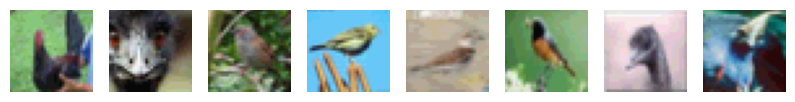

tensor(0.9375) tensor(-0.9375) 16


In [114]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/rupertmenneer/Documents/git/bayesian_flow/')
from datasets.cifar_10 import get_cifar10_dataloaders
k = 16
train_dls, val_dls, test_dls = get_cifar10_dataloaders(batch_size=128, num_bins=k)
print(len(train_dls), len(val_dls), len(test_dls))
import torch
from datasets.utils import plot_tensor_images
train_batch = next(iter(test_dls))
print(train_batch.shape)
plot_tensor_images(train_batch)
print(torch.max(train_batch), torch.min(train_batch), len(torch.unique(train_batch)))

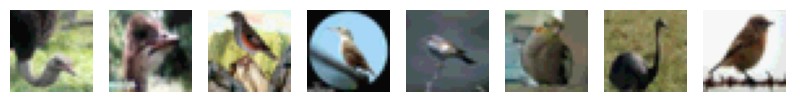

In [121]:
train_batch = next(iter(train_dls))
plot_tensor_images(train_batch)

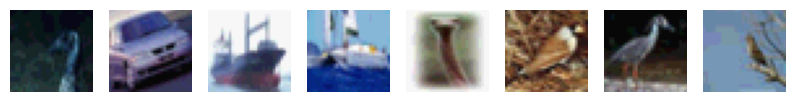

In [73]:
train_batch = next(iter(val_dls))
plot_tensor_images(train_batch)

In [ ]:
samples = samples.transpose(1, 3)
image_grid = get_image_grid_from_tensor(samples)
# Convert samples and priors to numpy arrays
image_grid = image_grid.detach().numpy()
priors_np = priors.detach().numpy()

In [ ]:
batch = next(iter(trainer.train_dls))
print(batch.shape)

In [ ]:
# trainer.bfn_model.continuous_time_loss_for_discretised_data(batch)
trainer.bfn_model.discrete_time_loss_for_discretised_data(batch)

In [ ]:
trainer.train()

In [ ]:
import torch
from datasets.utils import get_image_grid_from_tensor
model = trainer.bfn_model
model.eval()

# Generate samples and priors
samples, priors = model.sample_generation_for_discretised_data(n_steps=5)
samples = samples.to(torch.float32)


In [ ]:
print(samples.shape, image_grid.shape)

In [ ]:
import wandb
import numpy as np
wandb.init(project="bayesian_flow")
image_grid = np.transpose(image_grid, (2, 1, 0))
print(image_grid.shape)
images = wandb.Image(image_grid, caption="CIFAR10 - Sampled Images from BFN")
wandb.log({"image_samples": images})

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# Image.fromarray(image_grid)
plt.imshow()

In [ ]:
import torch
import torch.distributions as dist

d=8
bs=32
mu_x = torch.zeros((bs, d))
sigma_x = torch.ones((bs, d))
normal_dist = dist.Normal(mu_x, sigma_x)

k_lower = torch.linspace(-3, 3, 16)
k_lower_broadcasted = k_lower.repeat(d, bs, 1).transpose(0, 2)
# print(k_lower_broadcasted)
print(k_lower_broadcasted.shape)
correct_shape = torch.ones((16, bs, d))
cdf_values_lower = normal_dist.cdf(k_lower_broadcasted).permute(1, 2, 0)
print(cdf_values_lower.shape)
print(cdf_values_lower[0, 0, :])

In [ ]:
from datasets.cifar_10 import get_cifar10_dataloaders
k = 16
train_dls, val_dls, test_dls = get_cifar10_dataloaders(batch_size=128, num_bins=k)
print(len(train_dls), len(val_dls), len(test_dls))
import torch
from datasets.utils import plot_tensor_images
train_batch = next(iter(train_dls))
print(train_batch.shape)
plot_tensor_images(train_batch)
print(torch.max(train_batch), torch.min(train_batch), len(torch.unique(train_batch)))